### Thinking1
高德地图中的路径规划原理是怎样的？

### Thinking2
football.gml数据集中，美国大学生足球联赛，包括115支球队，被分为12个联盟。为什么使用LPA标签传播进行社区发现，只发现了11个社区？

### Thinking3
微博采用了类似FaceBook的EdgeRank算法，如果你给微博的信息流做设计，你会如何设计？

### Action1
使用Python模拟下面的PageRank计算过程，求每个节点的影响力（迭代100次）

![action1](./1.png)

#### 简化模型

In [54]:
import numpy as np

# 转移矩阵
a = np.array([[0, 0, 0, 1/3, 0, 0],
             [1/4, 0, 0, 0, 1/2, 0],
             [0, 1, 0, 1/3, 1/2, 0],
             [1/4, 0, 0, 0, 0, 1],
             [1/4, 0, 1, 1/3, 0, 0],
             [1/4, 0, 0, 0, 0, 0]])

# 初始化权重
b = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [95]:
w = b
for i in range(100):
    w = np.dot(a,w)
    print(w)

[0.05555556 0.125      0.30555556 0.20833333 0.26388889 0.04166667]
[0.06944444 0.14583333 0.32638889 0.05555556 0.38888889 0.01388889]
[0.01851852 0.21180556 0.3587963  0.03125    0.36226852 0.01736111]
[0.01041667 0.18576389 0.40335648 0.02199074 0.37384259 0.00462963]
[0.00733025 0.18952546 0.38001543 0.0072338  0.4132909  0.00260417]
[0.00241127 0.20847801 0.39858218 0.00443673 0.38425926 0.00183256]
[0.00147891 0.19273245 0.40208655 0.00243538 0.4006639  0.00060282]
[8.11792695e-04 2.00701678e-01 3.93876190e-01 9.72543724e-04
 4.03268068e-01 3.69727366e-04]
[3.24181241e-04 2.01836982e-01 4.02659894e-01 5.72675540e-04
 3.94403319e-01 2.02948174e-04]
[1.90891847e-04 1.97282705e-01 3.99229534e-01 2.83993484e-04
 4.02931831e-01 8.10453104e-05]
[9.46644947e-05 2.01513638e-01 3.98843285e-01 1.28768272e-04
 3.99371921e-01 4.77229617e-05]
[4.29227573e-05 1.99709627e-01 4.01242522e-01 7.13890854e-05
 3.98909874e-01 2.36661237e-05]
[2.37963618e-05 1.99465667e-01 3.99188360e-01 3.43968130e-0

In [96]:
# 迭代100次仍未收敛

#### 随机浏览模型

In [97]:
def random_work(a,w,d,epochs=100):
    for i in range(epochs):
        w = (1-d)/len(a) + d*np.dot(a,w)
        print(w)

random_work(a,w,0.85)

[0.025 0.195 0.365 0.025 0.365 0.025]
[0.03208333 0.1854375  0.35295833 0.0515625  0.34764583 0.0303125 ]
[0.03960938 0.17956719 0.34498073 0.05758333 0.34644167 0.03181771]
[0.04131528 0.1806547  0.3411851  0.06046204 0.34296589 0.03341699]
[0.04213091 0.17954    0.34144791 0.06218394 0.34091774 0.0337795 ]
[0.04261878 0.17884286 0.34011782 0.06266539 0.34180233 0.03395282]
[0.04275519 0.17932248 0.34003761 0.06291639 0.34091183 0.03405649]
[0.04282631 0.17897301 0.34013795 0.0630335  0.34094376 0.03408548]
[0.04285949 0.17900169 0.33988765 0.06307325 0.34107734 0.03410059]
[0.04287075 0.17906551 0.33998006 0.06309314 0.34088289 0.03410764]
[0.04287639 0.17898527 0.3399573  0.06310153 0.34096947 0.03411004]
[0.04287877 0.17902326 0.33992827 0.06310476 0.34095371 0.03411123]
[0.04287968 0.17901706 0.33995478 0.06310629 0.34093045 0.03411174]
[0.04288011 0.17900737 0.33994006 0.06310691 0.34095361 0.03411193]
[0.04288029 0.17901731 0.33994184 0.06310717 0.34094137 0.03411202]
[0.0428803

In [98]:
# 迭代100次已收敛

##### 用networkx检验

In [128]:
import networkx as nx

# 创建图
G = nx.DiGraph()
edges = [('A','B'), ('A','D'), ('A','E'), ('A','F'), ('B','C'), ('C','E'),
        ('D','A'), ('D','C'), ('D','E'), ('E','B'), ('E','C'), ('F','D')]
G.add_edges_from(edges)

In [137]:
# 计算随机浏览模型的PR值
random_pr = nx.pagerank(G,alpha=0.85)
print('随机浏览模型PR值：', random_pr)

随机浏览模型PR值： {'A': 0.04288042051996868, 'B': 0.17901275990207988, 'D': 0.0631073657542518, 'E': 0.3409441105134389, 'F': 0.034112089475917554, 'C': 0.3399432538343432}


In [138]:
nodesize = [random_pr[node]*20000 for node in G.nodes()]
nodesize

[857.6084103993736,
 3580.2551980415974,
 1262.1473150850359,
 6818.882210268778,
 682.2417895183511,
 6798.865076686864]

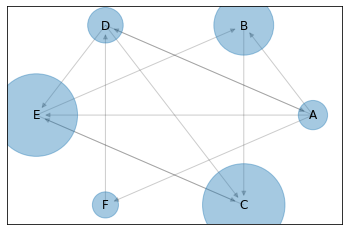

In [148]:
# 可视化
import matplotlib.pyplot as plt
layout = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos=layout, node_size=nodesize, alpha=0.4) # alpha为透明度
nx.draw_networkx_edges(G, pos=layout, alpha=0.2)
nx.draw_networkx_labels(G, pos=layout)
plt.show()

### Action2
使用TextRank对新闻进行关键词提取，及文章摘要输出

In [153]:
# 读取文本
with open('./news_高考.txt', 'r', encoding='utf-8') as f:
    corpus = f.readlines()
text = ''
for i in corpus:
    text += i.strip()
text 

'7月23日，在万般期待中，各地2020年高考录取分数线陆续公布，拿到分数后的考生们可谓有人欢喜有人愁。安徽省当天也公布了录取分数线，其中文理科一本分数线分别为541分和515分，二本分数线分别为499分和435分。那么被称为亚洲最大的“高考工厂”毛坦厂中学高考成绩怎样？图为毛坦厂中学教室午休的考生。7月23日，毛坦厂中学所在的安徽六安市毛坦厂镇官方发布喜报称，根据网络查询，六安市毛坦厂中学、金安高级中学、金安中学补习班2020年高考再创佳绩，再传捷报，安徽籍考生（不含外省考生）本科达线人数10176人，其中600分以上600分以上290人，理科最高分674分，文科最高分608分。也就是在2020年高考中，高考镇有1万多人达到本科线，听起来多少有点让人吃惊，这个数字还不包括其他十几个省份在毛坦厂复读的数百名考生。图为高考镇放学盛大的场面。今年的高考很特殊，因为疫情课业停摆两个多月，随后高考推迟一个月才考试，而就在考试进行时，安徽歙县因为洪水语文和数学被延期考试，湖北黄梅的考生硬是蹚水去考场，而云南一地的考生，考试时还发生了地震。图为高考前，高考镇的卡点。毛坦厂镇因为高考而驰名，被称为“亚洲最大的高考工厂”，外媒曾称该镇是一座偏僻的单一产业城镇，出产的是应试机器，就像其他一些专门生产袜子或圣诞饰品的中国乡镇一样心无旁骛。毛坦厂镇今年参加高考的考生人数超过1.7万人，涉及全国十多个省份。图为考生在上晚自习。据悉，毛坦厂镇面积只有3.5平方公里，人口不过万余人，从1999年后，毛坦厂中学借高考复读声名鹊起，每年都要吸引2万多学生和1万多陪读家长，整个小镇接近5万人。租房、生活、学习，众多学生和家长的到来，小镇的经济都围绕着“高考”在转。图为每天早晨，陪读家长在洗衣。在高考前，为了保障高考的顺利进行，高考镇实行了史上最严的“封锁”，在疫情开始之初，通往毛坦厂镇的所有道路都被切断，4月初，安徽省境内高三年级开始复课之后，因为外来复读学生较多，毛坦厂镇曾经短暂对外地家长和考生开放了几天，随之又实行严格管控，一直到7月5日考生离开高考镇时才解封。图为高考前，考生进入学校测量体温。也正是如此，今年的高考镇比往年低调了很多，连往年最热闹的送考节也没有举行，而是和其他所有普通学校一样，用几辆大巴将考生送到市区考试。图为往年的送考节。和衡水中学不一样，到高考镇来学习的都是普通考生，还有很

In [191]:
from textrank4zh import TextRank4Keyword, TextRank4Sentence

# 提取关键词(top10)
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=3, pagerank_config={'alpha': 0.85, })
print('关键词：')
for item in tr4w.get_keywords(10, word_min_len=2):
    print(item.word, item.weight)

关键词：
高考 0.0561910284818324
考生 0.04229947253711349
中学 0.01564725882438625
厂镇 0.015270437153080206
坦厂 0.01342788926095217
考试 0.012890430450963762
毛坦 0.012374789433256666
安徽 0.011541890740988228
家长 0.011021388113493073
复读 0.009964606550782447


In [178]:
# 提取关键句(top3)形成文章摘要
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source='all_filters')
summary_list = []
summary = ''
print('关键句：')
for item in tr4s.get_key_sentences(3):
    summary_list.append((item.index, item.sentence))
    print(item.index, item.weight, item.sentence)
print('-'*30)
summary_list.sort(key=lambda x: x[0])
for i,s in summary_list:
    summary += s+'。'
print('文章摘要：', summary)

关键句：
4 0.06799640479282443 7月23日，毛坦厂中学所在的安徽六安市毛坦厂镇官方发布喜报称，根据网络查询，六安市毛坦厂中学、金安高级中学、金安中学补习班2020年高考再创佳绩，再传捷报，安徽籍考生（不含外省考生）本科达线人数10176人，其中600分以上600分以上290人，理科最高分674分，文科最高分608分
12 0.06192582599548609 据悉，毛坦厂镇面积只有3.5平方公里，人口不过万余人，从1999年后，毛坦厂中学借高考复读声名鹊起，每年都要吸引2万多学生和1万多陪读家长，整个小镇接近5万人
15 0.05979224551975722 在高考前，为了保障高考的顺利进行，高考镇实行了史上最严的“封锁”，在疫情开始之初，通往毛坦厂镇的所有道路都被切断，4月初，安徽省境内高三年级开始复课之后，因为外来复读学生较多，毛坦厂镇曾经短暂对外地家长和考生开放了几天，随之又实行严格管控，一直到7月5日考生离开高考镇时才解封
------------------------------
文章摘要： 7月23日，毛坦厂中学所在的安徽六安市毛坦厂镇官方发布喜报称，根据网络查询，六安市毛坦厂中学、金安高级中学、金安中学补习班2020年高考再创佳绩，再传捷报，安徽籍考生（不含外省考生）本科达线人数10176人，其中600分以上600分以上290人，理科最高分674分，文科最高分608分。据悉，毛坦厂镇面积只有3.5平方公里，人口不过万余人，从1999年后，毛坦厂中学借高考复读声名鹊起，每年都要吸引2万多学生和1万多陪读家长，整个小镇接近5万人。在高考前，为了保障高考的顺利进行，高考镇实行了史上最严的“封锁”，在疫情开始之初，通往毛坦厂镇的所有道路都被切断，4月初，安徽省境内高三年级开始复课之后，因为外来复读学生较多，毛坦厂镇曾经短暂对外地家长和考生开放了几天，随之又实行严格管控，一直到7月5日考生离开高考镇时才解封。
